# **Health and Wellness** (CMSE 202 Project)

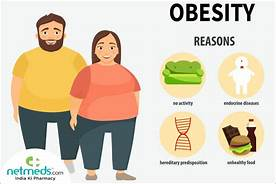

#### By: Deeya Patel, Shreyas Athreya, and Atticus Bartoli

## **Question**: 
What factors impact obesity the most? How do different strategies to alleviate obesity compare?

## **Data:**

***Source:***

Kaggle: https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels?resource=download&select=ObesityDataSet_raw_and_data_sinthetic.csv

In [1]:
import pandas as pd

obesity_df = pd.read_csv('Obesity_Data.csv', delimiter=',')
obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


***What does the data show?*** 
* The data provides demographic information as well as lifestyle choices of a large sample of people from which we can pull information on what factors influence obesity the most. Further, we can then then find ways to alleviate obesity based on that information.

***Defining Unknowns:***
* Frequent consumption of high caloric foods (FAVC)
* Frequency of consumption of vegetables (FCVC)
* Number of main meals (NCP)
* Consumption of food between meals (CAEC)
* Consumption of water daily (CH20)
* Calories consumption monitoring (SCC)
* Physical activity frequency (FAF)
* Time using technology devices (TUE)
* Consumption of alcohol (CALC)
* Transportation used (MTRANS)
* NObeyesdad is to indicate the Weight Classification

## Methodology / Results

### ***What factors cause obesity?***

**Step 1:** Import all neccessary modules

In [2]:
import pandas as pd # already used to load in data above
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

**Step 2:** Creating a correlation matrix using the data to see what factors impact obesity the most.

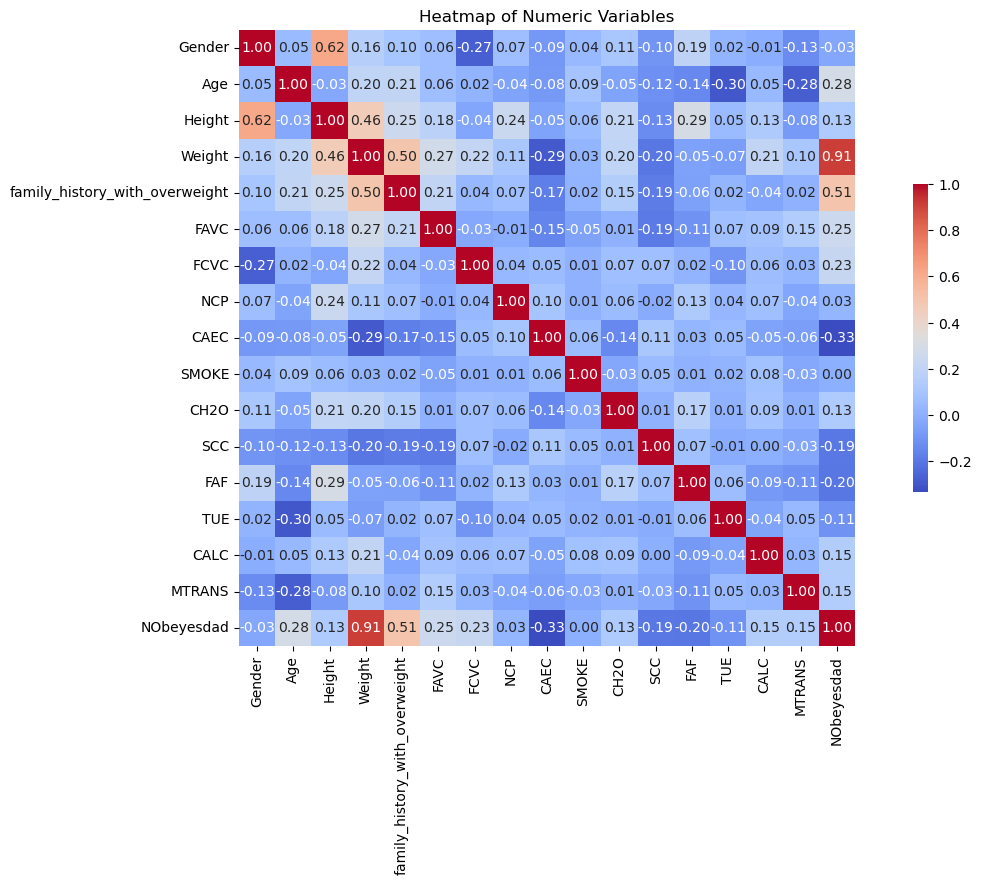

In [3]:
obesity_df1 = obesity_df

#unique_nobeyesdad_entries = obesity_df['NObeyesdad'].unique()
#unique_nobeyesdad_entries

columns_to_convert = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
columns_to_convert1 = ['CAEC', 'CALC']
obesity_df1[columns_to_convert] = obesity_df1[columns_to_convert].replace({'yes': 1.0, 'no': 0.0})
obesity_df1['Gender'] = obesity_df1['Gender'].replace({'Male': 1.0, 'Female': 0.0})
obesity_df1[columns_to_convert1] = obesity_df1[columns_to_convert1].replace({'Always': 1.0, 'Frequently': 0.67, 'Sometimes': 0.33, 'no': 0.0})
obesity_df1['MTRANS'] = obesity_df1['MTRANS'].replace({'Public_Transportation': 1, 'Automobile': 0.75, 'Motorbike': 0.5, 'Bike': 0.25, 'Walking': 0.0})
obesity_df1['NObeyesdad'] = obesity_df1['NObeyesdad'].replace({'Obesity_Type_III': 1.0, 'Obesity_Type_II': 0.8333, 'Obesity_Type_I': 0.6666, 'Overweight_Level_II': 0.5, 'Overweight_Level_I': 0.3333, 'Normal_Weight': 0.1666, 'Insufficient_Weight': 0.0})

obesity_df_clean = obesity_df1.dropna()
corr = obesity_df_clean.corr() 

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
plt.title('Heatmap of Numeric Variables')
plt.show()

#Significant variables for classification of weight are (above 0.2) : Age, *Family History, FAVC, FCVC, CAEC, FAF
#Significant variables for numerical weight are (above 0.2) : Age, *Height, *Family History, FAVC, FCVC, CAEC, CH20, SCC, CALC

**Step 3:** Using the correlation matrix pull some appropriate visualizations to characterize the features in the data that impact obesity the most.

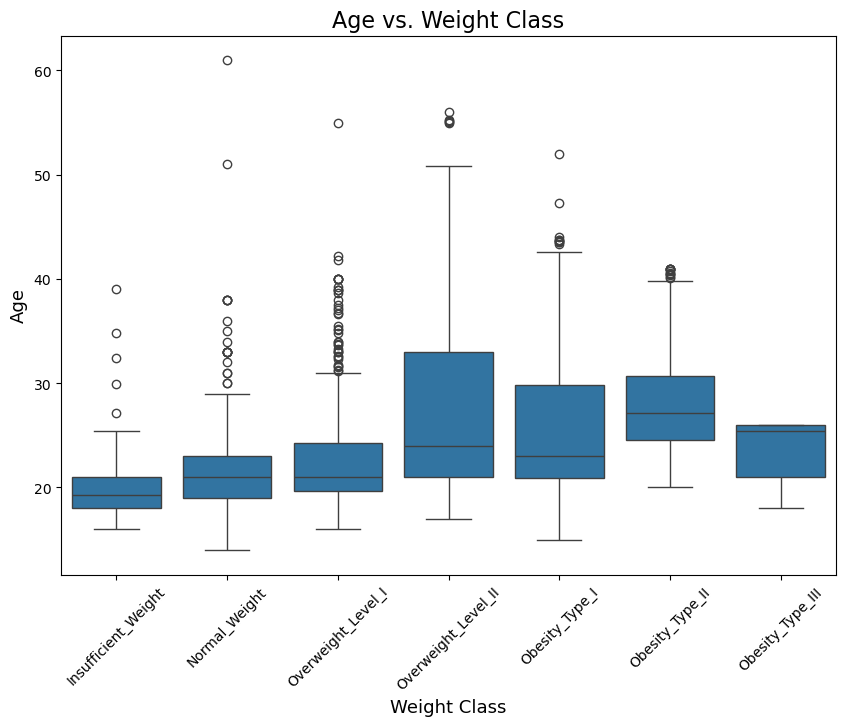

In [4]:
# This visualization is comparing age to weight class for individuals in the data set.

plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(x='NObeyesdad', y='Age', data=obesity_df1)
plt.title('Age vs. Weight Class', fontsize=16)
plt.xticks(rotation=45) 
plt.xlabel('Weight Class', fontsize=13)
plt.ylabel('Age', fontsize=13)

weight_class_mapping = {
    0.0: 'Insufficient_Weight',
    0.1666: 'Normal_Weight',
    0.3333: 'Overweight_Level_I',
    0.5: 'Overweight_Level_II',
    0.6666: 'Obesity_Type_I',
    0.8333: 'Obesity_Type_II',
    1.0: 'Obesity_Type_III'}

tick_labels = [weight_class_mapping[label] for label in sorted(obesity_df1['NObeyesdad'].unique())]
boxplot.set_xticks(range(len(tick_labels)))
boxplot.set_xticklabels(tick_labels)
plt.show()

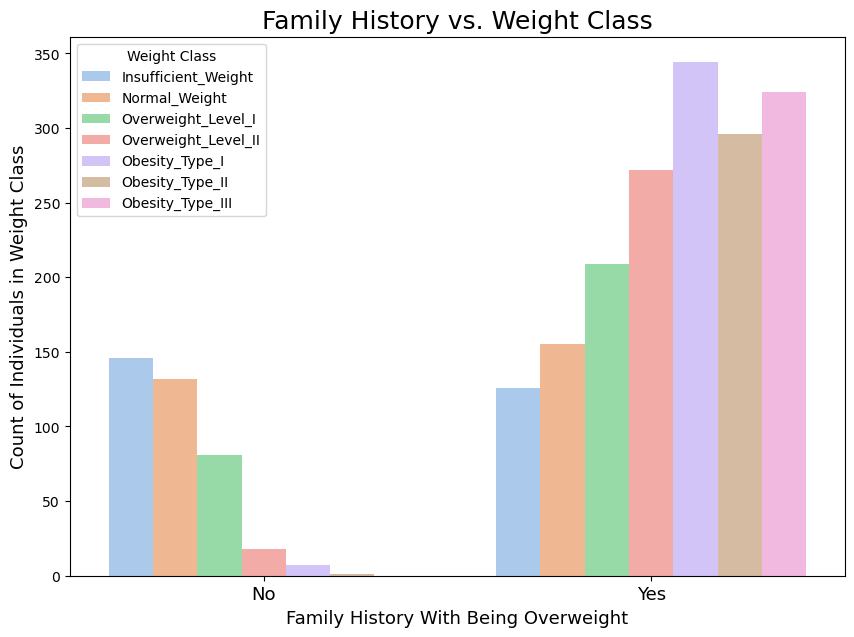

In [5]:
# This visualization compares the family history of being overweight to weight class.

labels = ['No', 'Yes']
x = [0, 1]

plt.figure(figsize=(10, 7))

sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=obesity_df1, palette='pastel')
plt.title('Family History vs. Weight Class', fontsize=18)

weight_class_mapping = {
    0.0: 'Insufficient_Weight',
    0.1666: 'Normal_Weight',
    0.3333: 'Overweight_Level_I',
    0.5: 'Overweight_Level_II',
    0.6666: 'Obesity_Type_I',
    0.8333: 'Obesity_Type_II',
    1.0: 'Obesity_Type_III'}

legend_labels = [weight_class_mapping[label] for label in sorted(obesity_df1['NObeyesdad'].unique())]
plt.legend(title='Weight Class', labels=legend_labels)

plt.xlabel('Family History With Being Overweight', fontsize=13)
plt.xticks(x, labels, fontsize=13)
plt.ylabel('Count of Individuals in Weight Class', fontsize=13)
plt.show()


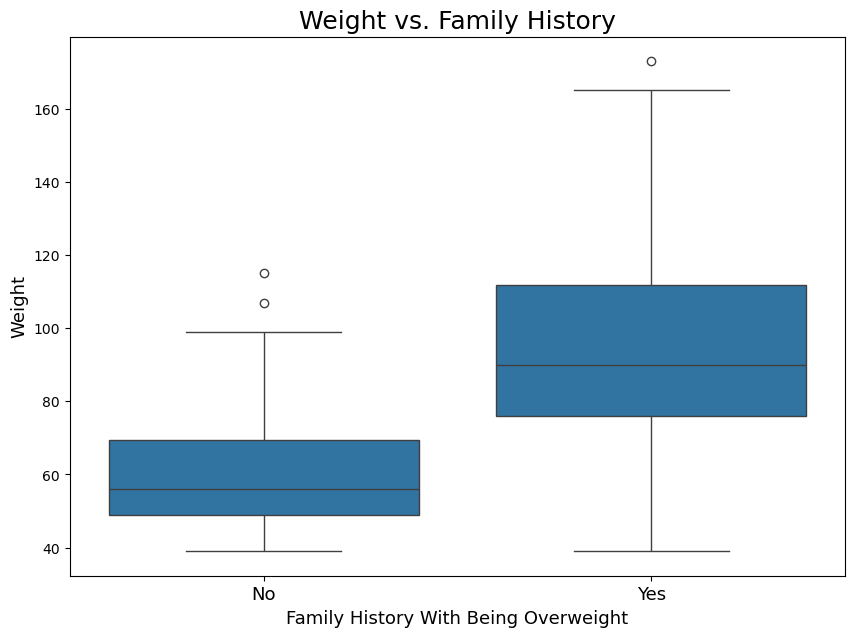

In [6]:
# Same as above... 0 indicates no family history with being overweight and 1 indicates there is a history.

labels1 = ['No','Yes']
x = [0, 1]

plt.figure(figsize=(10, 7))
sns.boxplot(x='family_history_with_overweight', y='Weight', data=obesity_df1)
plt.title('Weight vs. Family History',fontsize = 18)
plt.xticks(x, labels1,fontsize = 13)
plt.xlabel('Family History With Being Overweight',fontsize=13)
plt.ylabel('Weight',fontsize=13)
plt.show()

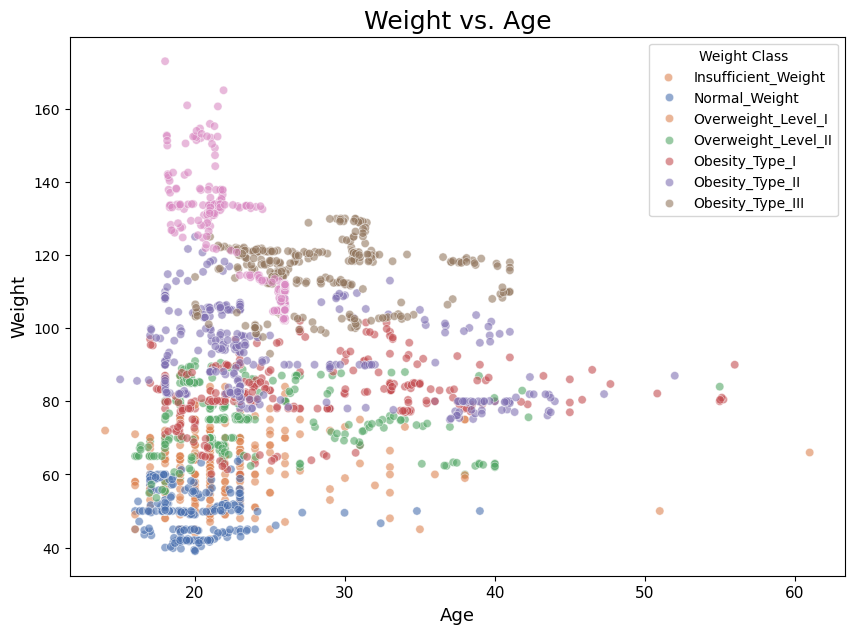

In [7]:
# Comparison graph of the weight vs. age

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Weight', data=obesity_df1, hue='NObeyesdad', alpha=0.6, palette='deep')

plt.title('Weight vs. Age', fontsize=18)

weight_class_mapping = {
    0.0: 'Insufficient_Weight',
    0.1666: 'Normal_Weight',
    0.3333: 'Overweight_Level_I',
    0.5: 'Overweight_Level_II',
    0.6666: 'Obesity_Type_I',
    0.8333: 'Obesity_Type_II',
    1.0: 'Obesity_Type_III'}

legend_labels = [weight_class_mapping[label] for label in sorted(obesity_df1['NObeyesdad'].unique())]
plt.legend(title='Weight Class', labels=legend_labels)

plt.xticks(fontsize=11)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Weight', fontsize=13)
plt.show()

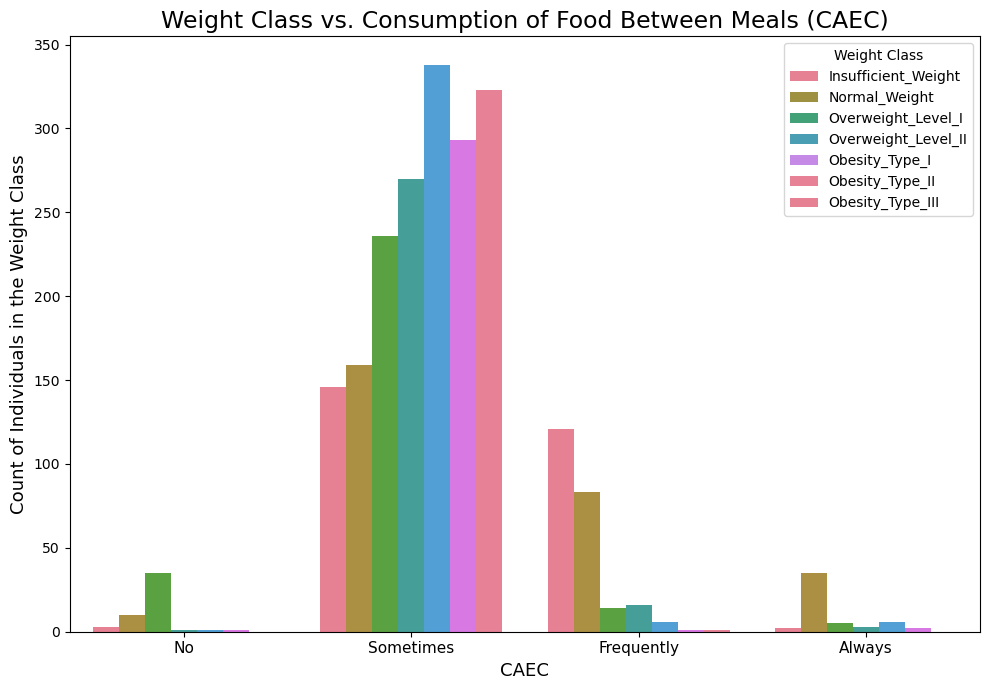

In [8]:
# Weight class consumption in relation to the frequency of consumption of food between meals
# Using bbox_to_anchor https://stackoverflow.com/questions/25068384/bbox-to-anchor-and-loc-in-matplotlib

labels5 = ['No', 'Sometimes', 'Frequently', 'Always']
x = [0, 1, 2, 3]

plt.figure(figsize=(10, 7))

# Define weight class mapping
weight_class_mapping = {
    0.0: 'Insufficient_Weight',
    0.1666: 'Normal_Weight',
    0.3333: 'Overweight_Level_I',
    0.5: 'Overweight_Level_II',
    0.6666: 'Obesity_Type_I',
    0.8333: 'Obesity_Type_II',
    1.0: 'Obesity_Type_III'
}

# Use pastel color palette
sns.countplot(x='CAEC', hue='NObeyesdad', data=obesity_df1, palette='husl')

plt.title('Weight Class vs. Consumption of Food Between Meals (CAEC)', fontsize=17)
plt.xticks(x, labels5, fontsize=11)
plt.legend(title='Weight Class', labels=[weight_class_mapping[label] for label in sorted(obesity_df1['NObeyesdad'].unique())])
plt.xlabel('CAEC', fontsize=13)
plt.ylabel('Count of Individuals in the Weight Class', fontsize=13)
plt.tight_layout()
plt.show()

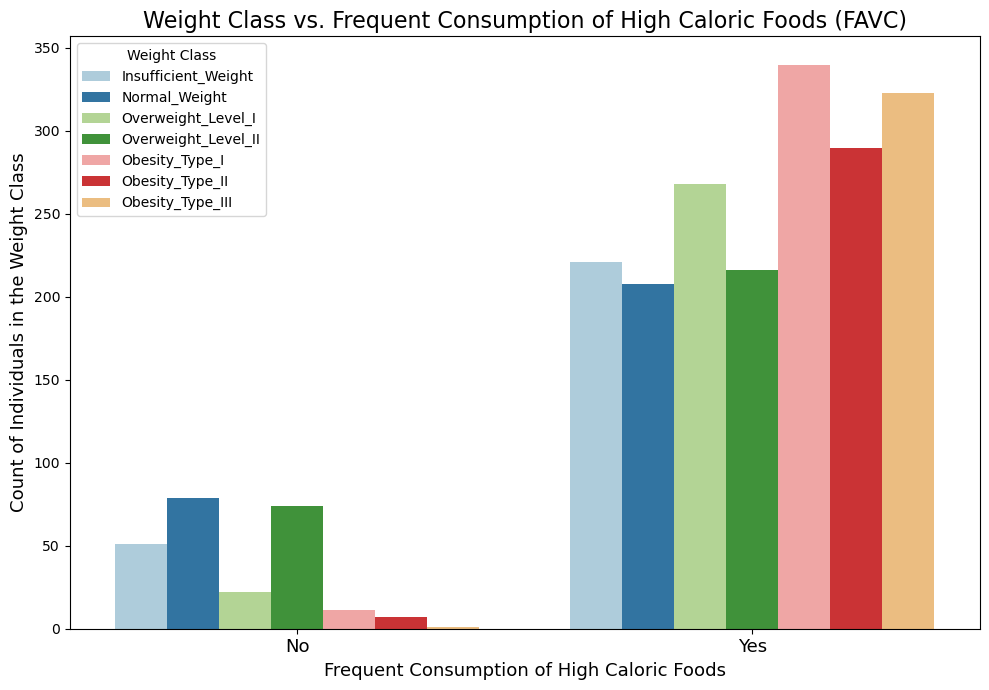

In [9]:
# Weight class in relation to the frequency of consumption of high caloric foods

labels2 = ['No', 'Yes']
x = [0, 1]

plt.figure(figsize=(10, 7))
weight_class_mapping = {
    0.0: 'Insufficient_Weight',
    0.1666: 'Normal_Weight',
    0.3333: 'Overweight_Level_I',
    0.5: 'Overweight_Level_II',
    0.6666: 'Obesity_Type_I',
    0.8333: 'Obesity_Type_II',
    1.0: 'Obesity_Type_III'}

sns.countplot(x='FAVC', hue='NObeyesdad', data=obesity_df1, palette='Paired')
plt.title('Weight Class vs. Frequent Consumption of High Caloric Foods (FAVC)', fontsize=16)
plt.xticks(x, labels2, fontsize=13)
legend_labels = [weight_class_mapping[label] for label in sorted(obesity_df1['NObeyesdad'].unique())]
plt.legend(title='Weight Class', labels=legend_labels)
plt.xlabel('Frequent Consumption of High Caloric Foods', fontsize=13)
plt.ylabel('Count of Individuals in the Weight Class', fontsize=13)
plt.tight_layout()
plt.show()

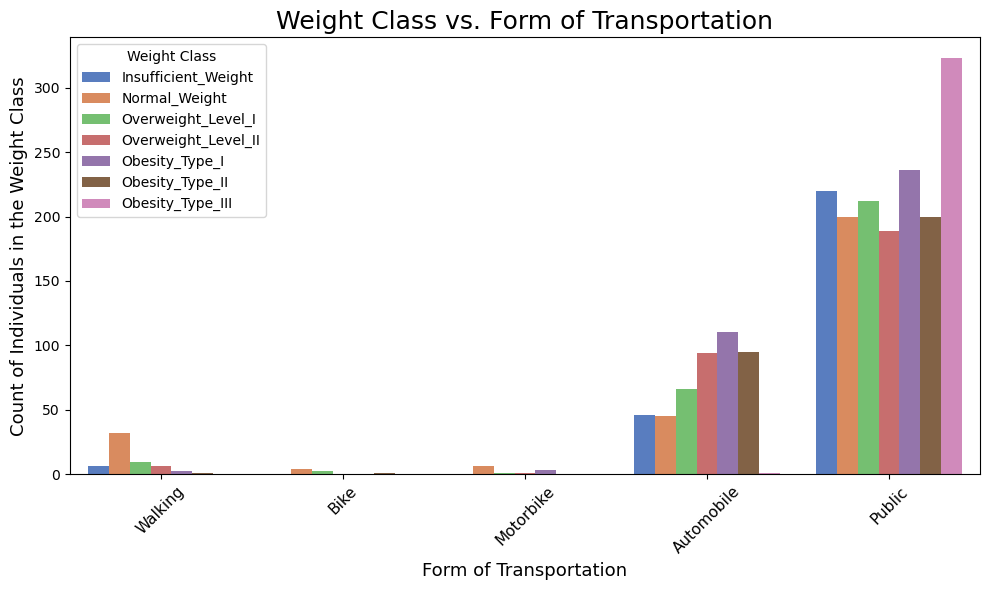

In [10]:
# Weight class in relation to the mode of transportation
plt.figure(figsize=(10, 6)) 

labels3 = ['Walking', 'Bike', 'Motorbike', 'Automobile', 'Public']
x = [0, 1, 2, 3, 4]

weight_class_mapping = {
    0.0: 'Insufficient_Weight',
    0.1666: 'Normal_Weight',
    0.3333: 'Overweight_Level_I',
    0.5: 'Overweight_Level_II',
    0.6666: 'Obesity_Type_I',
    0.8333: 'Obesity_Type_II',
    1.0: 'Obesity_Type_III'}

sns.countplot(x='MTRANS', hue='NObeyesdad', data=obesity_df1, palette='muted')
plt.title('Weight Class vs. Form of Transportation', fontsize=18)
plt.xticks(rotation=45)
legend_labels = [weight_class_mapping[label] for label in sorted(obesity_df1['NObeyesdad'].unique())]
plt.legend(title='Weight Class', labels=legend_labels)
plt.xticks(x, labels3, fontsize=11)
plt.xlabel('Form of Transportation', fontsize=13)
plt.ylabel('Count of Individuals in the Weight Class', fontsize=13)
plt.tight_layout()
plt.show()

**Step 4:** Creating an summary of the OLS regression results. This information can be used to determine if a feature is statistically significant as well as how well fit the model is for the data (using the R-squared).

In [11]:
X = obesity_df1[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']]
y = obesity_df1['NObeyesdad']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             NObeyesdad   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     2527.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:10:43   Log-Likelihood:                 2518.3
No. Observations:                2111   AIC:                            -5003.
Df Residuals:                    2094   BIC:                            -4906.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [12]:
# Finding the significant features from the OLS regression summary above

p_values = model.pvalues
feature_names = X.columns
significant_features = feature_names[p_values < 0.05]
print("Significant Features (p-value < 0.05):", significant_features)

Significant Features (p-value < 0.05): Index(['const', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'NCP', 'CAEC', 'FAF', 'CALC',
       'MTRANS'],
      dtype='object')


## ***What factors alleviate obesity?***

**Step 5:** Creating a class to display some object-oriented programming for factors that cause obesity. In this class we use the most significant variables from the data we observed from the OLS regression summary above and then pulled those features in creating a class for person classification summaries.

In [15]:
class Obesity:
    """A class to calculate Body Mass Index (BMI) and determine weight categories."""

    def __init__(self, high_caloric_food_consumption, mode_of_transport, physical_activity_level,
                 family_history_overweight, gender, height, age, weight, NCP, CAEC, FAF, CALC, MTRANS):
        """
        Initializes a BMICalculator object with various parameters.

        Parameters:
            high_caloric_food_consumption (int): The level of high caloric food consumption.
            mode_of_transport (int): The mode of transport (e.g., car, bicycle).
            physical_activity_level (float): The level of physical activity (range: 0 to 1).
            family_history_overweight (int): Whether there is a family history of overweight (0 or 1).
            gender (int): Gender of the person (0 for male, 1 for female).
            height (float): Height of the person in meters.
            age (int): Age of the person in years.
            weight (float): Weight of the person in kilograms.
            NCP (int): Number of main meals per day.
            CAEC (int): Consumption of food between meals.
            FAF (int): Frequency of physical activity.
            CALC (int): Consumption of alcohol.
            MTRANS (int): Mode of transportation.

        """
        self.high_caloric_food_consumption = high_caloric_food_consumption
        self.mode_of_transport = mode_of_transport
        self.physical_activity_level = physical_activity_level
        self.family_history_overweight = family_history_overweight
        self.gender = gender
        self.height = height
        self.age = age
        self.weight = weight
        self.NCP = NCP
        self.CAEC = CAEC
        self.FAF = FAF
        self.CALC = CALC
        self.MTRANS = MTRANS
        self.bmi = self.calculate_bmi()
        self.obesity_level = self.calculate_obesity_level()

    def calculate_bmi(self):
        """
        Calculate the Body Mass Index (BMI) based on height and weight.

        Returns:
            float: The calculated BMI rounded to 2 decimal places.
        """
        bmi = self.weight / (self.height ** 2)
        return round(bmi, 2)  # Round BMI to 2 decimal places

    def calculate_obesity_level(self):
        """
        Calculate the obesity level based on various factors.

        Returns:
            float: The calculated obesity factor rounded to 2 decimal places.
        """
        obesity_factor = (
            self.high_caloric_food_consumption +
            self.mode_of_transport +
            (1 - self.physical_activity_level) +
            self.family_history_overweight +
            self.gender +
            self.age / 100 +  # Normalize age
            self.NCP / 10 +  # Normalize NCP
            self.CAEC / 10 +  # Normalize CAEC
            self.FAF / 10 +  # Normalize FAF
            self.CALC / 10 +  # Normalize CALC
            self.MTRANS
        ) / 13  # Normalize the sum of factors
        return round(obesity_factor, 2)

    def get_weight_category(self):
        """
        Determine the weight category based on the calculated BMI.

        Returns:
            str: The weight category of the person.
        """
        bmi = self.calculate_bmi()
        if bmi < 18.5:
            return "Underweight"
        elif 18.5 <= bmi < 24.9:
            return "Normal weight"
        elif 24.9 <= bmi < 29.9:
            return "Overweight"
        elif 29.9 <= bmi < 34.9:
            return "Obesity Type 1"
        elif 34.9 <= bmi < 39.9:
            return "Obesity Type 2"
        else:
            return "Obesity Type 3 (Severe)"

    def print_summary(self):
        """Print a summary of the BMI calculation and associated factors."""
        print("BMI Calculator Summary:")
        print("-" * 30)
        print("High Caloric Food Consumption:", self.high_caloric_food_consumption)
        print("Mode of Transport:", self.mode_of_transport)
        print("Physical Activity Level:", self.physical_activity_level)
        print("Family History of Overweight:", self.family_history_overweight)
        print("Gender:", "Male" if self.gender == 0 else "Female")
        print("Height:", self.height, "m")
        print("Age:", self.age, "years")
        print("Weight:", self.weight, "kg")
        print("Number of Main Meals per Day (NCP):", self.NCP)
        print("Consumption of Food Between Meals (CAEC):", self.CAEC)
        print("Frequency of Physical Activity (FAF):", self.FAF)
        print("Consumption of Alcohol (CALC):", self.CALC)
        print("Mode of Transportation (MTRANS):", self.MTRANS)
        print("BMI:", self.bmi)
        print("Obesity Level:", self.obesity_level)
        print("Weight Category:", self.get_weight_category())

**Step 6**: Use the class above and create objects to display each weight class category type.

In [14]:
# Height is recorded in meters, age in years, and weight in kilograms to standardize
# Male is 0 and female is 1

underweight_person = Obesity(high_caloric_food_consumption=0, mode_of_transport=1, physical_activity_level=0.8, family_history_overweight=0, 
                                   gender=0, height=1.75, age=30,  weight=50,  NCP=3.0, CAEC=2.0, FAF=3.0, CALC=1.0, MTRANS=2)

normalweight_person = Obesity(high_caloric_food_consumption=0.6, mode_of_transport=0.3, physical_activity_level=0.4, family_history_overweight=0, 
                                  gender=1, height=1.65, age=28,  weight=65, NCP=2.5, CAEC=1.5, FAF=3.5, CALC=0.8, MTRANS=0.6)

overweight_person = Obesity(high_caloric_food_consumption=0.8, mode_of_transport=0.2, physical_activity_level=0.6, family_history_overweight=1,
                                  gender=0, height=1.80, age=35, weight=90, NCP=3.5, CAEC=2.5, FAF=4.0, CALC=0.5, MTRANS=0.7)

obesitytype2_person = Obesity(high_caloric_food_consumption=1, mode_of_transport=0, physical_activity_level=0.2, family_history_overweight=1, 
                                       gender=1, height=1.65, age=40, weight=105, NCP=1, CAEC=3, FAF=1, CALC=2, MTRANS=1)
underweight_person.print_summary()
print()
normalweight_person.print_summary()
print()
overweight_person.print_summary()
print()
obesitytype2_person.print_summary()

BMI Calculator Summary:
------------------------------
High Caloric Food Consumption: 0
Mode of Transport: 1
Physical Activity Level: 0.8
Family History of Overweight: 0
Gender: Male
Height: 1.75 m
Age: 30 years
Weight: 50 kg
Number of Main Meals per Day (NCP): 3.0
Consumption of Food Between Meals (CAEC): 2.0
Frequency of Physical Activity (FAF): 3.0
Consumption of Alcohol (CALC): 1.0
Mode of Transportation (MTRANS): 2
BMI: 16.33
Obesity Level: 0.34
Weight Category: Underweight

BMI Calculator Summary:
------------------------------
High Caloric Food Consumption: 0.6
Mode of Transport: 0.3
Physical Activity Level: 0.4
Family History of Overweight: 0
Gender: Female
Height: 1.65 m
Age: 28 years
Weight: 65 kg
Number of Main Meals per Day (NCP): 2.5
Consumption of Food Between Meals (CAEC): 1.5
Frequency of Physical Activity (FAF): 3.5
Consumption of Alcohol (CALC): 0.8
Mode of Transportation (MTRANS): 0.6
BMI: 23.88
Obesity Level: 0.32
Weight Category: Normal weight

BMI Calculator Summa

***Context:***
* NCP (Number of main meals per day)
    * Number seen is the amount of meals
* CAEC (Consumption of food between meals)
    * The higher the value the more consumption there is between meals.
    * 1 would be not so frequent consumption between meals and 4 would be heavy consumption between meals.
* FAF (Frequency of physical activity)
    * Higher the value the more frequent physical activity
* CALC (Consumption of Alcohol)
    * Higher the value the more alcohol they consume (more frequently)
* MTRANS (Mode of Transportation)
    * Lower MTRANS values: These could represent modes of transportation that require less physical activity, such as driving a car or using public transportation without much walking involved. (1: Sedentary transportation (e.g., car, bus) and 2: Moderate physical activity transportation (e.g., walking short distances, occasional cycling)
    * Higher MTRANS values: Conversely, higher values could represent modes of transportation that involve more physical activity, such as walking, cycling, or using stairs instead of elevators. (3: Active transportation (e.g., regular cycling, walking long distances) and 4: Highly active transportation (e.g., daily cycling, walking long distances regularly)

## Conclusion

### Data Analysis

***Analyzing the dataset***
* Majority of overweight individuals are among the youth
    * Less data may be present for older ages (funnel pattern)
* Public Transportation has the largest correlation to the levels of obesity
* People who "sometimes" eat between meals have the strongest relationship to Obesity Type III
* Family history and weight class has a strong positive correlation
    * Essentially all individuals recorded being overweight had a family history with it.
        * All people with Obesity Type III had a family history with it
* R-squared value of the OLS regression model: 0.951
    * Indicates the model is very well suited for our data
 
***How to alleviate obesity***
* Based on the summary from the class above a healthy persons profile tends to consist of X, Y, Z... so to alleviate obesity one might exercise more, have 3 consistent meals throughout a day, lower their alcohol consumption, and the consumption of food in between meals should be reduced as well.

### Complications

* Legend - When pulling the legend directly based off the dataframe it would only compile the information into 0-1, incremented by 0.2. This means that out of the 7 different weight classes in the df only 6 were being reflected.
    * Fixed the error by changing the color palette and adding individual weight class mapping to each graph
* Object-Oriented Programming / Classes
    * It took some time to find tune the classes to ensure that the inputs actually made sense with what was being outputed as the weight class
        * Resolved this issue by calculating both the BMI of the individual as well as the obesity level as a factor of the features from the dataset that we found to be significant
* Finding models that could appropriately depict the information from our dataset
    * Dataset required a lot of cleaning and weight class mapping

## References

***Please excuse the formatting it does that when copy and pasted over from citation machine***

Bajaj, Ankur. “Obesity Based on Eating Habits &amp; Physical Cond.” Kaggle, 17 Aug. 2020, www.kaggle.com/datasets/ankurbajaj9/obesity-levels?resource=download&amp;select=ObesityDataSet_raw_and_data_sinthetic.csv. 

user3897208user3897208&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 73311 gold badge55 silver badges99 bronze badges, et al. “Bbox_to_anchor and Loc in Matplotlib.” Stack Overflow, 1 May 1960, stackoverflow.com/questions/25068384/bbox-to-anchor-and-loc-in-matplotlib. 

“What Factors Contribute to Obesity?: Rethink Obesity®.” What Factors Contribute to Obesity? | Rethink Obesity®, www.rethinkobesity.com/disease-progression/factors-of-obesity.html gclid=5eb6070182f615d5f9b6611c142f1ff4&amp;gclsrc=3p.ds&amp;&amp;utm_source=bing&amp;utm_medium=cpc&amp;utm_term=obesity%2Bfactors&amp;utm_campaign=4_All_Shared_UB_Diagnosis&amp;utm_content=-dc_pcrid_73873721704670_pkw_obesity%2Bfactors_pmt_be_slid__product_&amp;pgrid=1181976004348649&amp;ptaid=kwd-73873690449747%3Aloc-190&amp;msclkid=5eb6070182f615d5f9b6611c142f1ff4. Accessed 15 Apr. 2024. 